# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [62]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [63]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)
data.head()

,0,1
0,0,0.019404
1,1,0.043634
2,2,0.023797
3,3,0.444340
4,4,0.578160


# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [64]:
def pdf(lamb,x):
    return lamb * np.exp(-lamb * x)

l1 = 1
l2 = 1
for a in data[1].values:
    l1 = l1 * pdf(lamb=1,x=a)
    
    l2 = l2 * pdf(lamb=2, x=a)
    
    
log_l1 = np.log(l1)
log_l2 = np.log(l2)

print("Likelihood1 : ",l1)
print("Likelihood2 : ",l2)
print("Log likelihood1 : ",(log_l1))
print("Log likelihood2 : ",(log_l2))
print("Difference : ",(log_l1-log_l2))

Likelihood1 :  5.52106601597132e-22
Likelihood2 :  3.864074103681613e-13
Log likelihood1 :  -48.94830108538966
Log likelihood2 :  -28.581884114784785
Difference :  -20.366416970604874


### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [65]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)
print(sample1.head())
print("")
print(sample2.head())

   0         1
0  0 -0.179278
1  1  0.236714
2  2  0.255502
3  3 -0.029321
4  4  0.004818

   0         1
0  0  0.680541
1  1  0.436810
2  2  0.604089
3  3  0.518702
4  4  0.479711


Find the parameters required to compute the T statistic

In [66]:
mean1 = sample1[1].mean()
mean2 = sample2[1].mean()
var1 = sample1[1].var()
var2 = sample2[1].var()
shape1 = sample1[1].size
shape2 = sample2[1].size
alpha = 0.05

Find the degrees of freedom to get the critical value

In [67]:
freedom = (((var1/shape1) + (var2/shape2))**2) / ((((var1/shape1)**2) / (shape1-1)) + (((var2/shape2)**2) / (shape2-1)))
freedom

146.81635513053357

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [68]:
t_stat = (mean1 - mean2) / np.sqrt((var1/shape1) + (var2/shape2))
critical_value = stats.t.pdf((1 - alpha)/2, freedom)
if np.abs(t_stat) > critical_value:
    print('Yes')
else:
    print('No')

Yes


Plot the distribution of both the samples to visualize

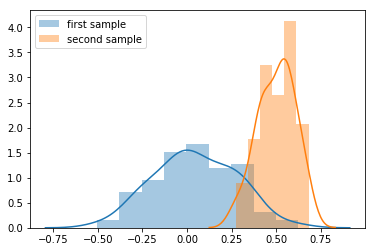

In [69]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()